<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Challenge" data-toc-modified-id="The-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Challenge</a></span><ul class="toc-item"><li><span><a href="#Fixed-Assumptions" data-toc-modified-id="Fixed-Assumptions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fixed Assumptions</a></span></li></ul></li><li><span><a href="#Model-Development:-Object-Detection" data-toc-modified-id="Model-Development:-Object-Detection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><em>Model Development:</em> Object Detection</a></span></li><li><span><a href="#Model-Validation:-Object-Detection" data-toc-modified-id="Model-Validation:-Object-Detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><em>Model Validation:</em> Object Detection</a></span></li><li><span><a href="#Controller-Validation:-Timers" data-toc-modified-id="Controller-Validation:-Timers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><em>Controller Validation:</em> Timers</a></span></li><li><span><a href="#Controller-Design-and-Validation:-Gate-with-Detector" data-toc-modified-id="Controller-Design-and-Validation:-Gate-with-Detector-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><em>Controller Design and Validation:</em> Gate with Detector</a></span><ul class="toc-item"><li><span><a href="#Controller-Design:-State-Transition-Diagram" data-toc-modified-id="Controller-Design:-State-Transition-Diagram-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><em>Controller Design:</em> State Transition Diagram</a></span></li><li><span><a href="#Controller-Design:-State-Transition-Table" data-toc-modified-id="Controller-Design:-State-Transition-Table-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><em>Controller Design:</em> State Transition Table</a></span></li><li><span><a href="#Controller-Validation:-FSM-Arduino-Code" data-toc-modified-id="Controller-Validation:-FSM-Arduino-Code-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span><em>Controller Validation:</em> FSM Arduino Code</a></span></li><li><span><a href="#Controller-Validation:-FSM-Video" data-toc-modified-id="Controller-Validation:-FSM-Video-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span><em>Controller Validation:</em> FSM Video</a></span></li></ul></li><li><span><a href="#Controller-Design-and-Validation:-Velocity-Control" data-toc-modified-id="Controller-Design-and-Validation:-Velocity-Control-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><em>Controller Design and Validation:</em> Velocity Control</a></span><ul class="toc-item"><li><span><a href="#Controller-Design:-Velocity-Control" data-toc-modified-id="Controller-Design:-Velocity-Control-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><em>Controller Design:</em> Velocity Control</a></span></li><li><span><a href="#Controller-Validation:-Arduino-Code" data-toc-modified-id="Controller-Validation:-Arduino-Code-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><em>Controller Validation:</em> Arduino Code</a></span></li><li><span><a href="#Controller-Validation:-FSM-Video" data-toc-modified-id="Controller-Validation:-FSM-Video-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span><em>Controller Validation:</em> FSM Video</a></span></li></ul></li></ul></div>

[IMPLEMENTATION RESOURCES](https://sabatind.github.io/ME480_Resources/)


## The Challenge

You have learned a lot of FSM design tools and skills and this challenge will require you implement everything you have learned to date to generate a more advanced control system for the zumo gate.  This new control system will make use of the LED and Photodiode detector built into your gate base to detect objects.  
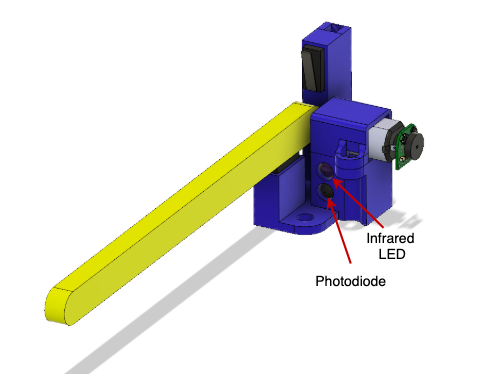








### Fixed Assumptions

* A momentary button on your workstation  will be used as a manual gate activation signal (to take the place of the floor sensor). The gate will begin in a default position of "closed." One [Unique Button Press](../W01C_FSM_FourBlock/W01C_FSM_FourBlock.ipynb#Example---Unique-Press) of BUTTON 1 will cause the gate to raise the gate and remain open for 3 seconds after reaching the fully up position.  It, will then lower automatically.
* If an object is detected in the path of the gate by the photodiode as the gate is lowering, it will reverse and go to the fully up position.  The gate will remain open for 3 seconds before lowering again, but only if the object blocking the gate is no longer present.  Only objects that will be hit by the gate were it to reach the fully down position should cause the gate to rise.
* To protect the motor, the motor will stop running when the gate arm is fully down or fully up.

## *Model Development:* Object Detection

To meet this week's challenge, we'll need a new type of sensor.  Something that can detect the distance of an object without contact.  For this challenge you will use a combination of an infrared (IR) LED and a photodiode. 
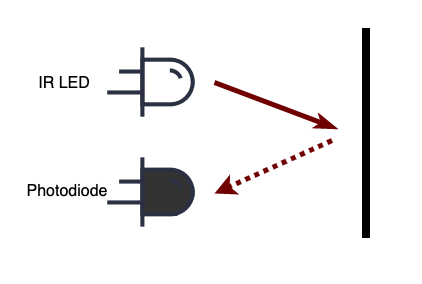
The IR LED is like the green LED on your workstation that illuminates when you apply power.  In this case the light produced is not visible as it is in the Infrared (IR) spectrum.  But how does and LED work?  [Similar to transistors](../Lab_1/Lab_1.ipynb#Model-Development:-Transistor-Model),  a light emitting diode uses semiconductors but is actually a bit simpler than a transistor.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/BH9LI973H8w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We'll use the IR LED as a source to illuminate an object nearby and a photodetector to capture and light reflected by back from the object.  **Photodetectors work almost the same as and LED, just in reverse as described below.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/SyZ3s45StaM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The symbols for LEDs and Photodiodes are similar as well.  The direction of the arrows, indicating the light either being emitted or absorbed, makes the distinction.

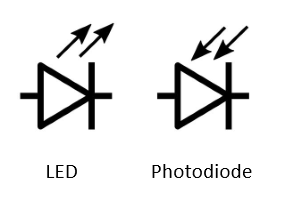


Below is a schematic of the the circuit that is connected to the IR LED and Photodiode installed in your gate module.  **You don't need to create these circuits.  They are already part of your printed circuit board**.  

For these ciruits, the more light that reaches the photodiode, the more the current will flow "backwards" through the diode (it is made like a diode, it has a symbol like diode, but it behaves differently).  As current increases through the 10K resistor, the measured voltage difference across it will increase.  The voltage difference can be measured by the arduino using its **analog in** capability.

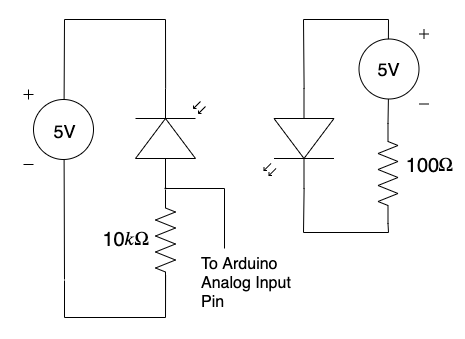

Using the [Hardware Resource Workstation Arduino Mega Pin Mapping](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Hardware_Resource.html#Workstation-Arduino-Mega-Pin-Mapping), identify the pin for IR Detector 1.  You'll use that pin to measure the voltage difference generated by the photodiode.

Write an arduino program to read the voltage from the photodiode and output the measured voltage to the serial monitor.  You'll need to use your [Arduino Resource](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Arduino_Resource.html#Common-Functions) to find a command to read the voltage of an analog input.  

Use the ```serial.Print()``` command to pintout the value read from the photodiode output by the Arduino.  With the code running, move an object (your hand or your zumo) closer and further from the sensor and printout the 

For quick real-time observation of the behavior, you can show the serial output on the Serial Plotter.  The plotter is found in the *TOOLS* menu of the Arduino software right next to the Serial Monitor.  In order to use the plotter, you must format your data to print in columns by printing **spaces or tabs** in between each number and using [Serial.print()](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Arduino_Resource.html#Using-the-Serial-Monitor-and-Serial.Print()) to create a new line after each "moment" in time.

## *Model Validation:* Object Detection

**Capture a data set by copying/pasting the serial monitor output into a text file in your Jupyter Lab_2 folder.**  

**In the Octave cell below, plot the output showing the varyation in of the signal showing when an object (this can just be your hand) moves from close to the sensor to "he edge of the region of interest" (about a gate blade's length).** 

**Indicate on your plot, or in the code output using the `disp()` function, the measured value for when the object is "right next to" the sensor and when it is just past the end of the gate.**

**Finally, using `disp()`, indicate the threshold value you ultimately select to represent in a boolean statement when something IS or IS NOT below the gate.**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

**Put your properly formatted Arduino code in the cell below (properly formatted using \~\~\~c and \~\~\~)**


YOUR ANSWER HERE

## *Controller Validation:* Timers

You will need new programming capability for this challenge and one of those elements is a timer.  Adopting the mindset that you should take steps that have managable risk and can be readily assessed for success,  it is a fairly large risk to take on the whole challenge along with the addition of new programming tools. 

Therefore, to take a step that we can see more clearly and better assess, we use the working gate operation code and add just one element: the basic timer functionality.  This way we can focus on understanding and implementing the timer class introduced in [W02A FSM TimersCounters: Controller Validation: Arduino Code](../W02A_FSM_TimersCounters/W02A_FSM_TimersCounters.ipynb#Controller-Validation:-Timers-and-Rising-Edge-Counters-in-Arduino).

Now modify your gate code so that the **when the gate is down and the button is pressed, it waits 1 second before it raises.** 


Points: 
5
ID: 
cell-d455f28f71f74116

Manually graded answer

YOUR ANSWER HERE

Place a link to a video showing the operation of the timer in the cell below.

YOUR ANSWER HERE

## *Controller Design and Validation:* Gate with Detector

Using the validated model of your emitter/detector and your validated knowledge of timers, design, implement and test a controller that meets the design criteria described in the fixed assumptions of the challenge.

### *Controller Design:* State Transition Diagram


YOUR ANSWER HERE
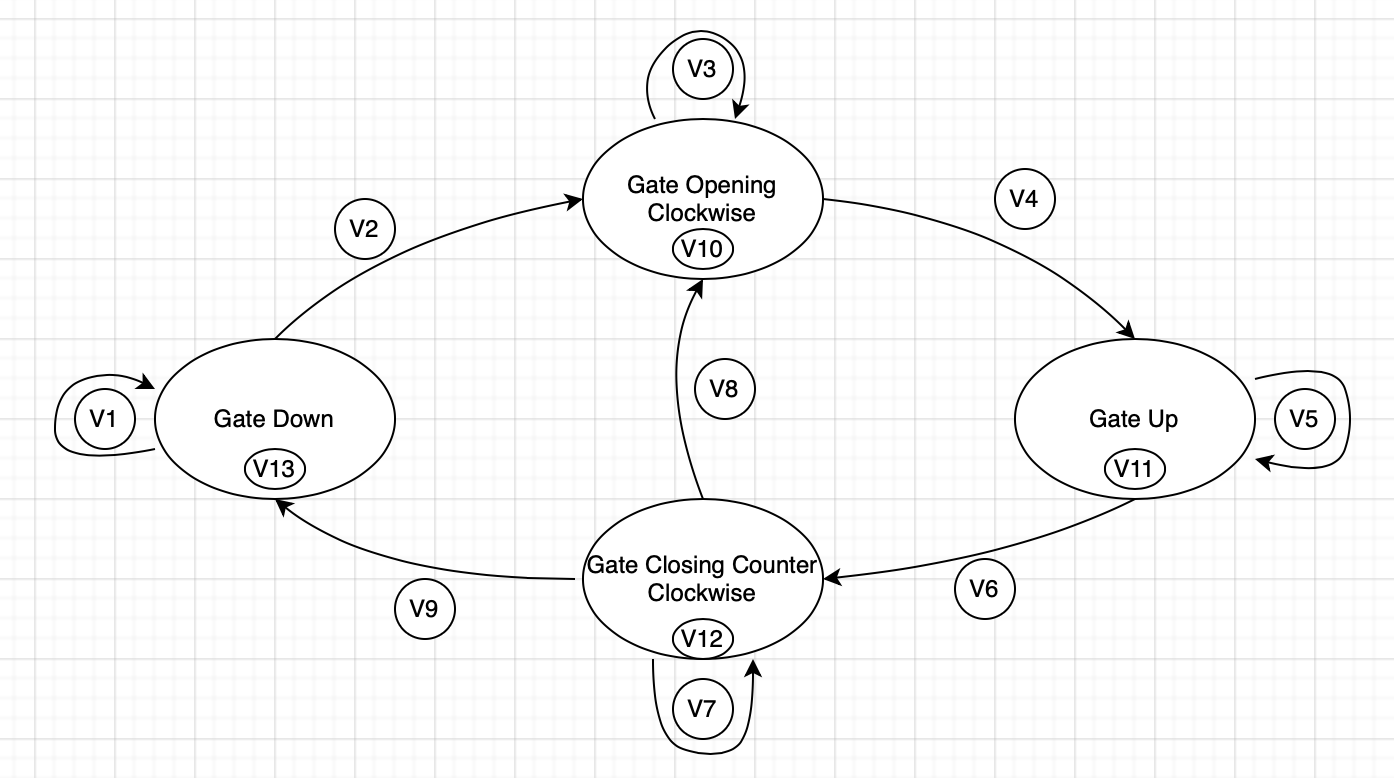

### *Controller Design:* State Transition Table

YOUR ANSWER HERE

### *Controller Validation:* FSM Arduino Code

**Include in the cell below a copy of your completed Arduino code in the cell below (properly formatted using \~\~\~c and \~\~\~)**


YOUR ANSWER HERE

### *Controller Validation:* FSM Video

Put a LINK to a video of your gate working in the cell below.  You can use media.lafayette.edu, youtube, vimeo, etc. to host your video

YOUR ANSWER HERE

## *Controller Design and Validation:* Velocity Control

With the state transition logic working for your gate controller, an additional assumption is added by request of the customers for your gate system.  They do not like how the gate's speed is not consistent between opening and closing.  You can see the difference in the time it takes to complete each movement.  Therefore, you need to modify your code to be consistnt with the following **additional fixed assumption**

* Adjust the angular velocity of the gate arm such that it is:
    * Reasonably constant throughout the raising motion (just based on your observation)
    * Reasonably consistent between raising and lowering
    * Slow enough to reduce "bounce" when it contacts the switches
    

Save your existing code and create a copy to modify.  Change the code in *any way you see fit* to approximate as best as possible a constant velocity rotation up and down with as little bounce at the limit switches as is possible.

**<font color = "red"> REMEMBER!  Lab is for exploring and developing your understading.  A perfectly constant gate speed is NOT the goal.  The goal is to do enough to see what it would take to get SOME control of the velocity.</font>**

### *Controller Design:* Velocity Control
In the cell below, explain your approach to generating a constant velocity gate arm motion.


YOUR ANSWER HERE

### *Controller Validation:* Arduino Code

Include in the cell below a copy of your **PROPERLY FORMATTED** updated Arduino code.

YOUR ANSWER HERE

### *Controller Validation:* FSM Video

Put a LINK to a video of your gate working in the cell below.  You can use media.lafayette.edu, youtube, vimeo, etc. to host your video

YOUR ANSWER HERE